# 4장. 모델 훈련 (Training Linear Models)

참고 사이트
- https://codingalzi.github.io/handson-ml2/notebooks/handson-ml2-04.html


## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 4.1 Linear Regression (선형 회귀)

#### 1) 선형 모델의 예측 : 입력 특성의 가중치의 합 + 편향(bias) 상수 -> 예측값을 만듦.
- 예측함수 만들기

#### 2) 모델 훈련 (= '모델 파라미터'를 훈련 세트에 가장 잘 맞도록 설정)
- 1. 모델을 측정
    - 회귀에 가장 많이 사용되는 성능 지표: RMSE
    - but, MSE를 이용해 더 간단히 측정 -> MSE 비용함수
    <br>
    <br>
- 2. MSE(θ) 함수를 최소화하는 θ값 찾기
    - MSE 비용함수를 최소화할 수 있는 θ값을 찾기 위한 방식 2가지.
         1. 정규방정식 (The Normal Equation)
         2. 경사하강법 (Gradient Descent)

### 4.1.1) The Normal Equation (정규방정식)
- θ값을 바로 얻을 수 있고 & 직접 계산하는 경우 활용하는 수학 공식

1. 선형처럼 보이는 데이터 생성

In [2]:
X = 2 * np.random.rand(100,1)             #X:특성 x1을 갖는 100개의 데이터
y = 4 + 3 * X + np.random.randn(100,1)    #y:100개의 레이블(선형함수에 noise(잡음)추가)

> - np.random.rand(100,1) : 0~1 사이의 **균일 분포(uniform distribution)**에서 무작위 추출  --> 100개의 숫자 & 1개의 열을 가진 배열
> - np.random.randn(100,1) : 평균이 0, 표준편차가 1인 **표준 정규 분포(standard normal distribution)**에서 무작위 추출(부동소수점) --> 100개의 행 & 1개의 열을 가진 배열 추출

In [3]:
linreg_data = np.c_[X,y]

> - `np.c_[X,y]` : 배열을 **수평**방향으로 결합 ex) X=[1,2,3],y=[4,5,6] 이라면 ➡️ 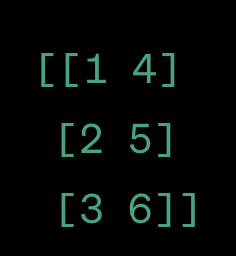
    - 각각 X에 따른 y의 값을 확인할 수 있음.

> ✔️참고) 배열을 **수직**방향으로 결합 : `np.r_[X,y]` - [X, y]이런 형태 ex) [1,2,3,4,5,6]

In [4]:
linreg_data[:5]

array([[0.74908024, 6.33428778],
       [1.90142861, 9.40527849],
       [1.46398788, 8.48372443],
       [1.19731697, 5.60438199],
       [0.31203728, 4.71643995]])

Saving figure generated_data_plot


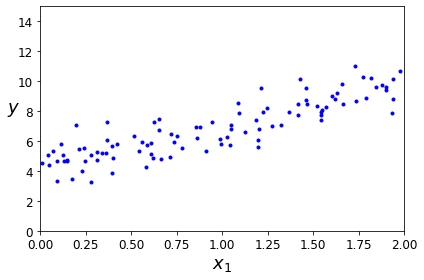

In [5]:
#특성 x1과 레이블 y의 관계를 그려보자. (무작위로 생성한 선형 데이터셋)

plt.plot(X, y, "b.")                         #"b.":파란색 & 점 (산점도 표시)
plt.xlabel("$x_1$", fontsize=18)             #x축 레이블 
plt.ylabel("$y$", rotation=0, fontsize=18)   #x축 레이블
plt.axis([0, 2, 0, 15])                      #x축, y축 구간 지정

save_fig("generated_data_plot")
plt.show()

> 기본적으로 선형 관계를 갖지만 noise로 인해 약간 퍼져있음.

2. 정규방정식을 이용하여 $\hat\theta$ 구하기

- 일반적으로 n개의 특성을 갖는 임의의 크기의 데이터셋 X가 주어졌을 때, $(\mathbf{X}^T \mathbf{X})^{-1}$의 역행렬이 존재하고, 일정 시간 내에 계산이 가능할 때 <br> -> 최적의 파라미터 조합 $\boldsymbol{\hat\theta}$을 정규방정식으로 구할 수 있다.

$$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

In [6]:
X_b = np.c_[np.ones((100,1)), X]   #모든 샘플에 x0=1을 추가 ⬅️ 절편인 θ0을 고려하기 위해

> `np.ones((100,1))` : 모든 요소가 1로 채워진 100개의 행과 1개의 열로 이루어진 배열

> `X_b`: 훈련 세트에 **편향(0번 열(x0)에 1)이 추가**된 배열 (x0=1 추가)


(사이킷런을 사용할 때는 모델이 알아서 추가해줌)

In [7]:
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [8]:
# 위의 코드와 관련된 간단 예시

a = np.ones((4,1))
b = np.random.rand(4,1)

ab_combined = np.c_[a,b]
ab_combined

array([[1.        , 0.7948113 ],
       [1.        , 0.50263709],
       [1.        , 0.57690388],
       [1.        , 0.49251769]])

- Numpy 선형대수 모듈인 `np.linalg` 사용하여 $\boldsymbol{\hat\theta} = [\theta_0, \theta_1]$를 구해보자.

    - `inv()` 함수: 역행렬 계산
    - `dot()` 함수: 행렬 곱셈

$$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

In [9]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

> - theta_best: $\boldsymbol{\hat\theta}$ -> $\boldsymbol{\hat\theta} = [\theta_0, \theta_1]$ 형태
> - 코드 설명:
    - $(\mathbf{X}^T \mathbf{X})^{-1}$ : `inv(X_b.T.dot(X_b))`
    - $\mathbf{X}^T \mathbf{y}$ : `dot(X_b.T).dot(y)`
    
> 사용한 함수: $y=4+3x1+ 가우시안잡음 $

In [10]:
#정규방정식으로 계산된 ^θ=[θ0, θ1] 
theta_best

array([[4.21509616],
       [2.77011339]])

> 기대한 값: $\theta_0$=4, $\theta_1$=3 
<br>➡️ but, 잡음 때문에 정확히 재현x

3. 계산된 $\boldsymbol{\hat\theta}$을 사용해 예측해보자.
- `x1=0` & `x2=2` 일때의 예측값($\hat{y}$) 구하기.
    - -> 이 때는 단순한 **행렬 곱셈에 불과** : 
    $\hat{y} =  \mathbf{X}\, \boldsymbol{\hat{\theta}}$

In [11]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #여기서도 모든 샘플에 x0=1 추가해야 함
X_new_b

array([[1., 0.],
       [1., 2.]])

- 예측값을 구해보자.

In [12]:
#예측값
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

- 그래프로 나타내보자 ➡️ $\theta_0$:절편, $\theta_1$:기울기로 설정

Saving figure linear_model_predictions_plot


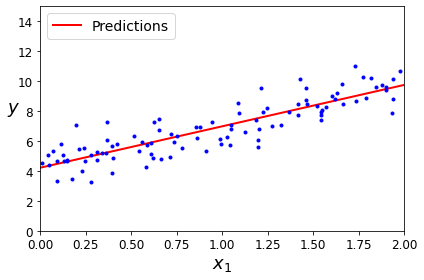

In [13]:
#그래프 (선형 회귀 모델의 예측)

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")  #예측값(θhat)을 이용한 직선

plt.plot(X,y, "b.")  #파란 점의 형태로 예측값 구하기 전 그래프의 산점도  
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.legend(loc="upper left", fontsize=14)  #범례 지정
plt.axis([0, 2, 0, 15])                    #x축 구간:0~2, y축 구간:0~15

save_fig("linear_model_predictions_plot")
plt.show()

#### 사이킷런의 `[LinearRegression] 모델`을 이용하여 선형 회귀 수행

- LinearRegression 클래스의 계산 방식 : **특잇값 분해(SVD)**를 이용 -> 무어-펜로즈의 **유사 역행렬$\mathbf{X}^+$** 활용하여 파라미터 $\hat{\theta}$ 구하기
     - 함수: $\hat{\boldsymbol{\theta}} = \mathbf{X}^+ \mathbf{y}$ 
     
     <br>
     <br>
     
> - 특잇값 분해(SVD): 행렬을 3개의 행렬의 곱(U, $\Sigma$, $\mathbf{V}^T$ )으로 분해

> - 유사 역행렬($\mathbf{X}^+$)
    - 역행렬이 존재하지 않거나 계산이 어려울 때 사용.
    - 유사 역행렬을 구할 때는 일반적으로 SVD 방식을 이용 : 원래 행렬 분해 -> 알고리즘이 대각행렬($\Sigma$)을 구함 -> 낮은 임계값보다 작은 수를 모두 0으로 바꿈 -> 0이 아닌 모든 값을 역수로 치환 -> 이 행렬을 전치
    - 정규방정식보다 효율적

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() #객체 
lin_reg.fit(X,y)             #훈련

LinearRegression()

In [15]:
#절편(θ0), 기울기(θ1)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [16]:
lin_reg.predict(X_new) #X_new: x1=0 & x2=2 

array([[4.21509616],
       [9.75532293]])

> x1=0 & x2=2 일 때 수동으로 계산하여 구했던 예측값(3번에서)과 동일한 $\theta_0$, $\theta_1$ 예측값이 나왔다.

#### 🌎  `fit()`함수 대신 사용할 수 있는 2가지 방법
1. `scipy.linalg.lstsq()` 함수(least squares 최소제곱으로부터 파생)를 **직접 호출** 
-  $\hat{\boldsymbol{\theta}} = \mathbf{X}^+ \mathbf{y}$ 계산
    - (위에서 언급했던 것처럼 LinearRegression 모델이 위의 함수를 기반으로 하기 때문에)
- 이 과정에서 유사 역행렬을 구함

In [17]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

2. Numpy의 `np.linalg.pinv()`함수로 **유사 역행렬**을 구하여 계산하기
    - $\hat{\boldsymbol{\theta}} = \mathbf{X}^+ \mathbf{y}$

In [18]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])